In [2]:
import pandas as pd

df = pd.read_csv("Dataset.csv")  # your file path
print(df.head())
print(df.info())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [3]:
df.drop(columns=['Restaurant ID', 'Address', 'Locality', 'Locality Verbose',
                 'Longitude', 'Latitude', 'Currency', 'Rating color', 'Rating text', 'Votes'], inplace=True)


In [4]:
df.dropna(inplace=True)


In [5]:
df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(',')[0].strip().lower())


In [6]:
from sklearn.preprocessing import LabelEncoder

le_city = LabelEncoder()
df['City'] = le_city.fit_transform(df['City'].str.lower())

le_table = LabelEncoder()
df['Has Table booking'] = le_table.fit_transform(df['Has Table booking'])

le_online = LabelEncoder()
df['Has Online delivery'] = le_online.fit_transform(df['Has Online delivery'])

le_delivery = LabelEncoder()
df['Is delivering now'] = le_delivery.fit_transform(df['Is delivering now'])

le_switch = LabelEncoder()
df['Switch to order menu'] = le_switch.fit_transform(df['Switch to order menu'])


In [7]:
X = df.drop(columns=['Restaurant Name', 'Cuisines'])  # input features
y = df['Cuisines']  # target


In [8]:
X = df.drop(columns=['Restaurant Name', 'Cuisines'])  # input features
y = df['Cuisines']  # target


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.30591932949188055
                 precision    recall  f1-score   support

        afghani       0.00      0.00      0.00         1
        african       0.00      0.00      0.00         0
       american       0.16      0.16      0.16        55
         andhra       0.00      0.00      0.00         1
          asian       0.10      0.06      0.07        17
   asian fusion       0.00      0.00      0.00         1
         bakery       0.16      0.11      0.13       109
       bar food       0.00      0.00      0.00         6
            bbq       0.33      0.20      0.25         5
        bengali       0.00      0.00      0.00         4
      beverages       0.25      0.08      0.12        13
         bihari       0.00      0.00      0.00         0
        biryani       0.10      0.05      0.06        22
      brazilian       0.40      0.50      0.44         4
      breakfast       0.00      0.00      0.00         3
        british       0.00      0.00      0.00         4


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

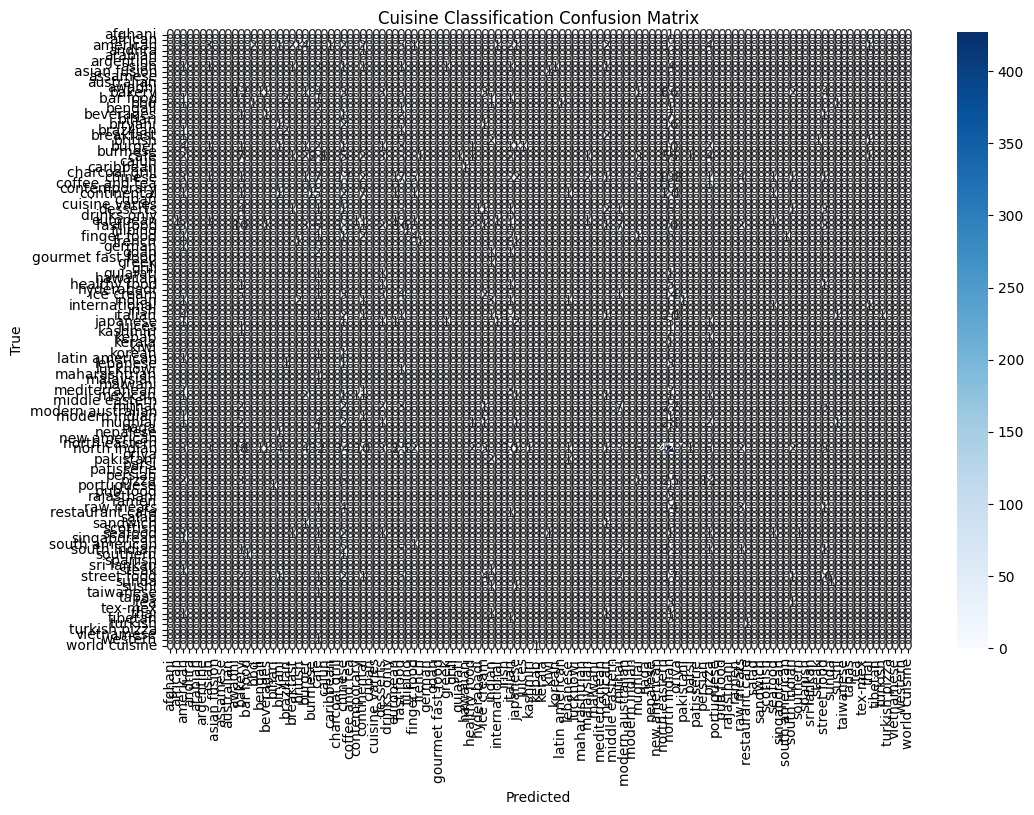

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues", fmt='g', annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Cuisine Classification Confusion Matrix")
plt.show()
